# Clases y objetos

## Diseñando una clase

* Una **clases** es una *plantilla* que describe las propiedades que caracterizan a un **objeto**. Cada clases contiene datos (**miembros**) y funciones (**métodos**) que operan sobre los objetos.
* Para referirnos a los miembros y métodos de una clase utilizamos la *notación punto*: escribimos el nombre del objeto seguido de un punto y del miembro o método deseado.

## Ejemplo 1: una cuenta bancaria



En este ejemplo creamos una clase para representar una **cuenta** bancaria.

Los **miembros** que debe guardar un objeto de esta clase son:
* `cliente`
* `saldo`
* `número`
* `fecha_apertura`

Los **métodos** que debe ejecutar la cuenta son
* `depositar()`
* `retirar()`
* `transferir()`

Además, debemos implementar estos métodos:
* `__init__()`  cómo se abre una cuenta
* `__repr__()`  cómo se imprime una cuenta

Finalmente, el método **transferir** debe verificar que la cuenta de destino exista.

In [1]:
from datetime import datetime

In [2]:
class cuenta:
    total_abiertas = 0
    existentes = dict()
    
    def __init__(self, cliente):
        cuenta.total_abiertas += 1
        self.cliente = cliente
        self.saldo = 0
        self.número = f'UCR{cuenta.total_abiertas:04d}'
        self.fecha_apertura = datetime.now()
        cuenta.existentes[self.número] = self
        print(f"Se ha abierto la cuenta {self.número} a nombre de {self.cliente} el {self.fecha_apertura}")
        
    def __repr__(self):
        return f"Cuenta {self.número}, cliente {self.cliente}, saldo = {self.saldo}"
    
    def depositar(self, monto):
        if monto < 0:
            print("ERROR: monto no puede ser negativo")
        else:
            self.saldo += monto
            print(f"Se depositó {monto} en la cuenta {self.número}. Nuevo saldo es {self.saldo}")
            
    def retirar(self, monto):
        if monto < 0:
            print("ERROR: monto no puede ser negativo")
        elif monto > self.saldo:
            print("ERROR: fondos insuficientes")
        else:
            self.saldo -= monto
            print(f"Se retiró {monto} en la cuenta {self.número}. Nuevo saldo es {self.saldo}")
    
    def transferir(self, monto, otra_cuenta):
        if monto < 0:
            print("ERROR: monto no puede ser negativo")
        elif monto > self.saldo:
            print("ERROR: fondos insuficientes")
        if otra_cuenta not in cuenta.existentes:
            print("ERROR: cuenta destino no existe.")
        else:
            self.saldo -= monto
            cuenta.existentes[otra_cuenta].saldo += monto
            print(f"Se transfirió {monto} de la cuenta {self.número} a la cuenta {otra_cuenta}.")
       
            

Para probar la clase, abramos la cuenta `cta1` a nombre de "Rodrigo" y la cuenta `cta2` a nombre de "Pedro"

In [3]:
 cta1 = cuenta("Rodrigo")
 cta2 = cuenta("Pedro")  

Se ha abierto la cuenta UCR0001 a nombre de Rodrigo el 2022-03-27 19:06:38.498920
Se ha abierto la cuenta UCR0002 a nombre de Pedro el 2022-03-27 19:06:38.498920


Depositamos 400 en la cuenta de "Rodrigo"

In [4]:
cta1.depositar(400)
cta1

Se depositó 400 en la cuenta UCR0001. Nuevo saldo es 400


Cuenta UCR0001, cliente Rodrigo, saldo = 400

Rodrigo le transfiere 200 a Pedro

In [5]:
cta1.transferir(200, "UCR0002")

Se transfirió 200 de la cuenta UCR0001 a la cuenta UCR0002.


Revisamos las cuentas existentes

In [6]:
cuenta.existentes

{'UCR0001': Cuenta UCR0001, cliente Rodrigo, saldo = 200,
 'UCR0002': Cuenta UCR0002, cliente Pedro, saldo = 200}

Revisamos el saldo de Pedro

In [7]:
cta2.saldo

200

Rodrigo retira 200 colones.

In [8]:
cta1.retirar(200)

Se retiró 200 en la cuenta UCR0001. Nuevo saldo es 0


Pedro intenta retirar un monto superior a su saldo

In [9]:
cta2.retirar(3600)

ERROR: fondos insuficientes


Por último, volvemos a revisar las cuentas.

In [10]:
cuenta.existentes

{'UCR0001': Cuenta UCR0001, cliente Rodrigo, saldo = 0,
 'UCR0002': Cuenta UCR0002, cliente Pedro, saldo = 200}

## Ejemplo 2: un polinomio


En este ejemplo creamos una clase para representar un **polinomio**.

\begin{equation}
P(x) = c_0 + c_1x + c_2x^2 + \dots c_nx^n, \qquad c_n=0
\end{equation}




Los **miembros** que debe guardar un objeto de esta clase son:
* `coefs` = $[c_0, c_1, c_2, \dots, c_n]$
* `grado` = $n$

Los **métodos** que debe ejecutar la cuenta son
* `simplificar()` para eliminar los monomios de mayor grado que tengan coeficiente cero
* `plot()` para graficar el polinomio

Además, debemos implementar estos métodos:
* `__init__()`  cómo se crea un polinomio
* `__repr__()`  cómo se imprime un polinomio
* `__add__()`   para sumar dos polinomios
* `__call__()`  para evaluar un polinomio

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
class polinomio:
    
    def __init__(self, *coeficientes):
        self.coefs = np.array(coeficientes)
        self.simplificar()
        self.grado = len(self.coefs) - 1
        
    def __repr__(self):
        monomios = [f"{c if c!=1 else ''}{'x' if k else ''}{f'^{k}' if k>1 else''}" for k, c in enumerate(self.coefs) if c!=0]
        return ' + '.join(monomios)
    
    def simplificar(self):
        coefs = list(self.coefs)
        while coefs[-1] == 0:
            coefs.pop()
        self.coefs = np.array(coefs)
    
    def __add__(self, otro):
        grado = max(self.grado, otro.grado)
        coefs = np.zeros(1 + grado)
        coefs[:self.grado+1] = self.coefs
        coefs[:otro.grado+1] += otro.coefs
        return polinomio( *coefs  ) 
        
    def __call__(self, x):
        resultado = np.zeros_like(x)
        for coef in self.coefs[-1:0:-1]:
            resultado += coef
            resultado *= x
        return resultado + self.coefs[0]
    
    def plot(self, ax, a, b, n=121, **kwargs):       
        x = np.linspace(a, b, n)
        ax.plot(x, self(x), **kwargs)
        ax.set_title(str(self))
        return ax

Creamos el polinomio $P(x)= 9 + 2x^2 +2x^3$

In [13]:
P = polinomio(9, 0, 2, 2)
P

9 + 2x^2 + 2x^3

Creamos el polinomio $Q(x) = 3 + x + x^2 -2x^3$

In [14]:
Q = polinomio(3,1,1,-2)
Q

3 + x + x^2 + -2x^3

Sumamos los dos polinomios: $R(x) = P(x) + Q(x)$

In [15]:
R = P + Q
R

12.0 + x + 3.0x^2

Graficamos los 3 polinomios en una figura, en el rango $x\in[-2,2]$, cada uno en su propio eje de coordenadas.

<AxesSubplot:title={'center':'12.0 + x + 3.0x^2'}>

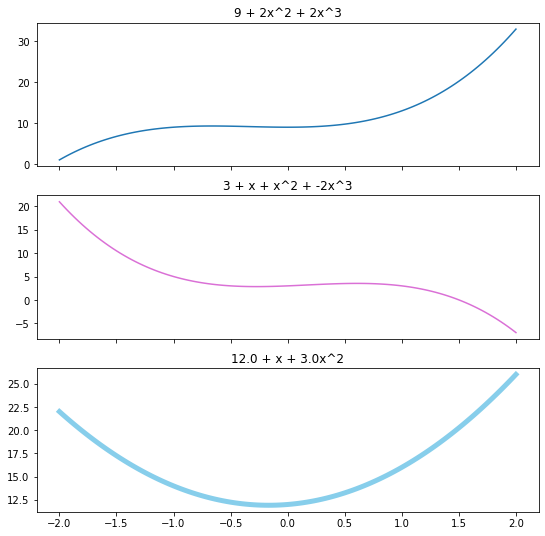

In [16]:
fig, axs = plt.subplots(3,1, figsize=[9,9], sharex=True)
P.plot(axs[0], -2,2)
Q.plot(axs[1], -2,2, color='orchid')
R.plot(axs[2], -2,2, color='skyblue', linewidth=5)

## Ejemplo 3: un modelo de regresión lineal

In [4]:
class RegresiónLineal:

    def __init__(self, y: str, X: str, data):
        X = X.split()
        variables = [y] + X
        datos = data[variables].dropna(how='any')

        self.y = datos[[y]]                        # variable endógena
        self.X = datos[variables]                  # variables exógenas
        self.X.iloc[:, 0] = 1.0                    # intercepto
        self.residuos = np.zeros_like(self.y)      # residuos
        self.names = dict(X = ['intercepto'] + X, y = y)  # nombres de las variables
        self.nobs, self.nvar = self.X.shape        # número de observaciones y de variables

    def ols(self):
        """
        ols: Estima una regresión lineal con mínimos cuadrados ordinarios
        """
        y, X = self.y.values, self.X.values  # extraer datos como arrays de numpy
        xpxi = np.linalg.inv(X.T @ X)        # (X'X)^{-1}
        beta = xpxi @ (X.T @ y)              # estimador mínimos cuadrados
        yhat = X @ beta                      # valores ajustados
        resid = y - yhat                     # residuos
        sigu = (resid**2).sum()              # sumatoria de residuos al cuadrado
        sige = sigu / (self.nobs - self.nvar)  # varianza estimada del término de error
        bstd = np.sqrt(sige * np.diag(xpxi))   # error estándar de los coeficientes estimados


        tstat = beta.T / bstd                 # estadístico t-Student
        rsqr2 = ((y - y.mean())**2).sum()     # suma de cuadrados de (desviación respecto a la media) de los datos endógenos
        R2 = 1.0 - sigu * rsqr2               # estadístico R^2

        as_series = lambda coef, name: pd.Series(coef.flatten(), index = self.names['X'], name=name) # función para convertir en serie (etiquetada) los parámetros estimados

        self.beta = as_series(beta, 'beta')
        self.bstd = as_series(bstd, 'bstd')
        self.tstat = as_series(tstat, 'tstat')
        self.residuos = resid

        self.yhat = yhat

    def resumen(self):
        return pd.concat([self.beta, self.bstd, self.tstat], axis=1)

In [5]:
X = np.random.randn(100, 2)
e = np.random.randn(100, 1)
beta = np.array([[1.5], [0.8]])

y = 1.0 + X @ beta + e

data = pd.DataFrame(np.c_[y,X], columns = ['PIB', 'C', 'G'])

modelo = RegresiónLineal('PIB', 'C G', data)

modelo.ols()
modelo.resumen()

,beta,bstd,tstat
intercepto,0.935763,0.092340,10.133861
C,1.548043,0.097660,15.851386
G,0.779599,0.100384,7.766181
